<a href="https://colab.research.google.com/github/Tejesh-25/Industrial_Copper_Modeling/blob/Machine_Learning/Industrial_Copper_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df=pd.read_excel("/content/Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [4]:
df.shape

(181673, 14)

In [5]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

**Changing data types to their respectively formats**

In [6]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [7]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [8]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [9]:
df['material_ref']=df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [10]:
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [11]:
df.drop(['id','material_ref'],axis=1,inplace=True)

In [12]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [14]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x <=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if x <=0 else x)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [16]:
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

**Handling missing values**

In [17]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [18]:
#handling missing values using median and mode.
#object data types using mode.
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace=True)
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace=True)

#numerical data using median.
df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)



In [19]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

**Converting categorical values in numerical form**

In [20]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [21]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [22]:
mapping_status={'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8}
df['status']=df['status'].map(mapping_status)

In [23]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [24]:
df['item type'].value_counts()

5.0    105615
3.0     69236
2.0      5660
1.0       610
6.0       524
0.0        27
4.0         1
Name: item type, dtype: int64

In [25]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.00001,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.00000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


**Skweness Handling - Log Transformation**

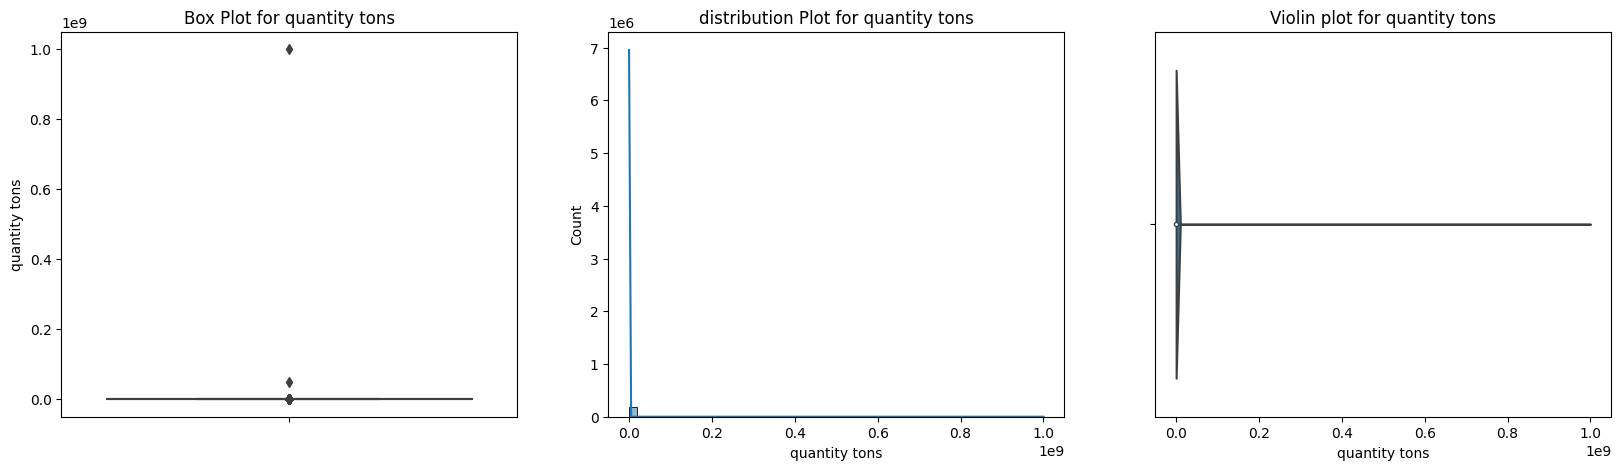

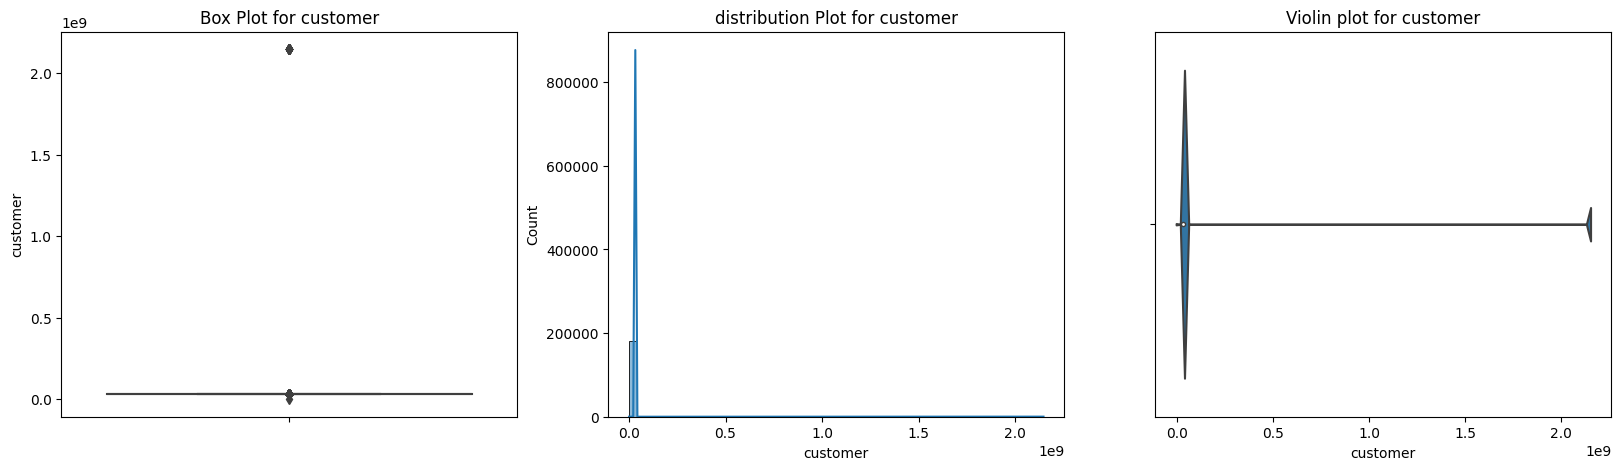

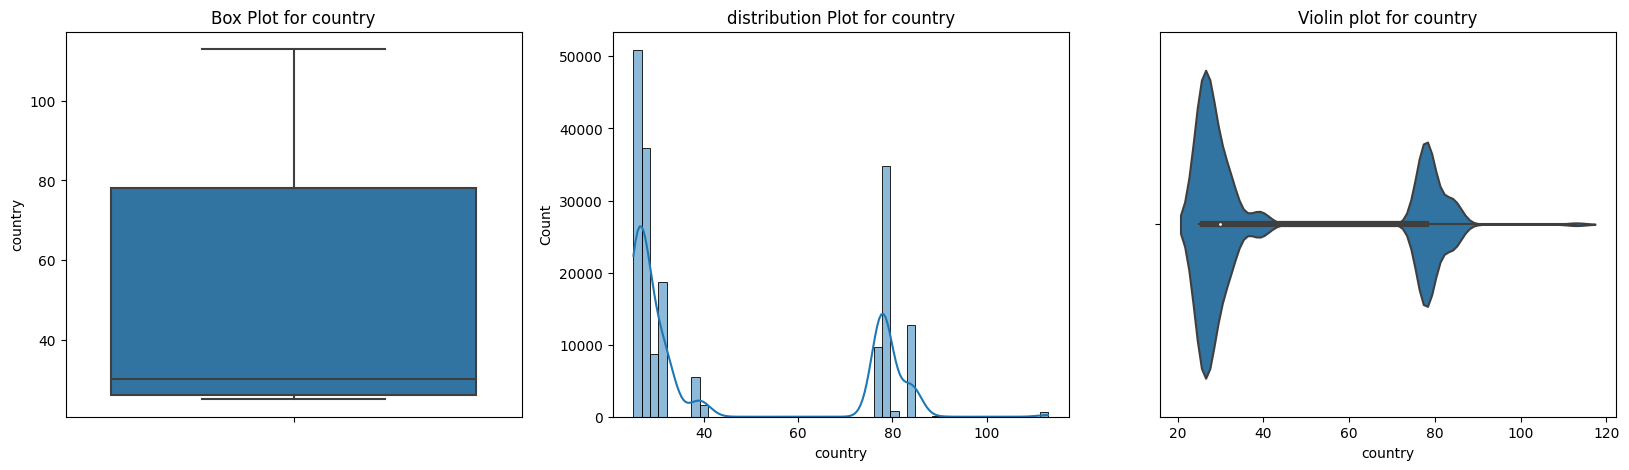

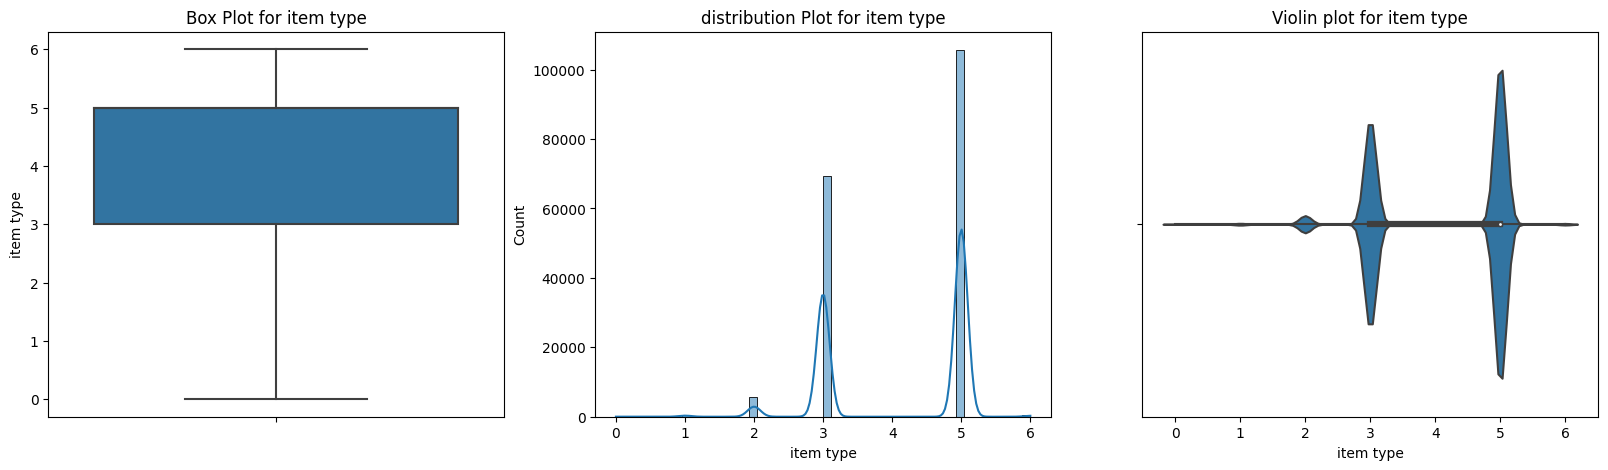

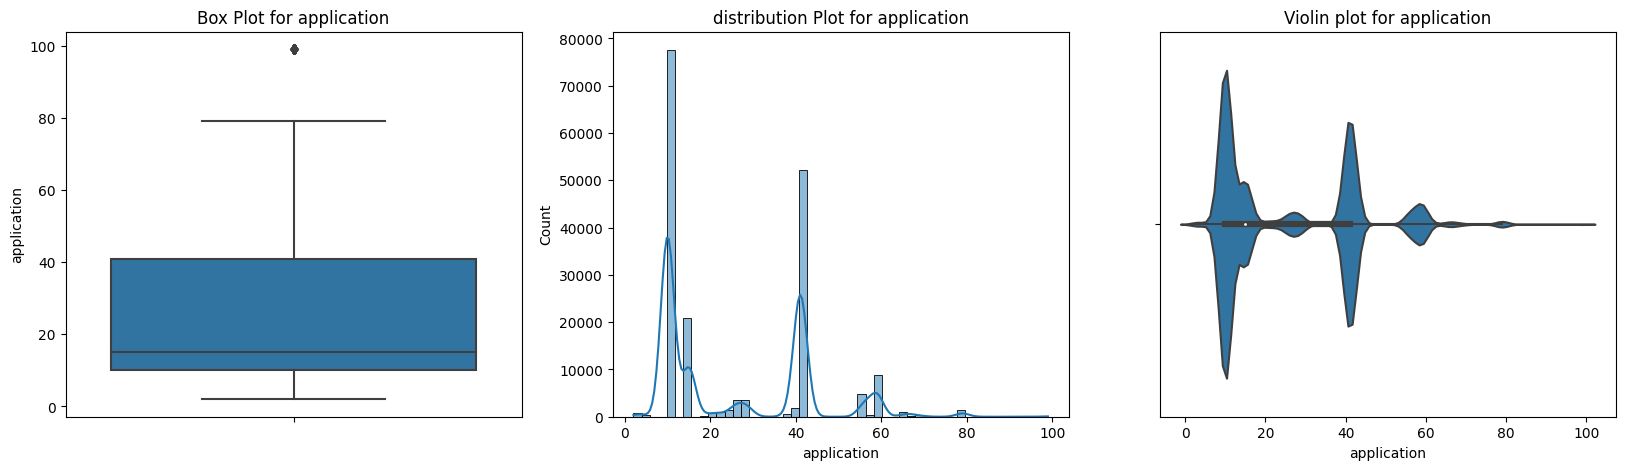

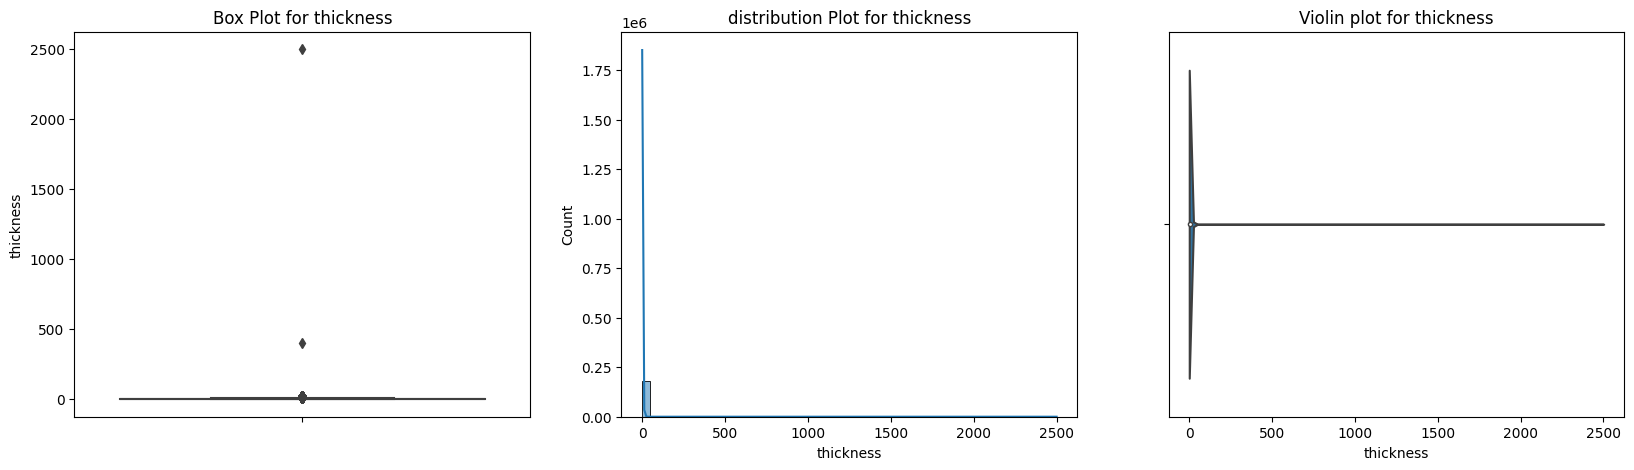

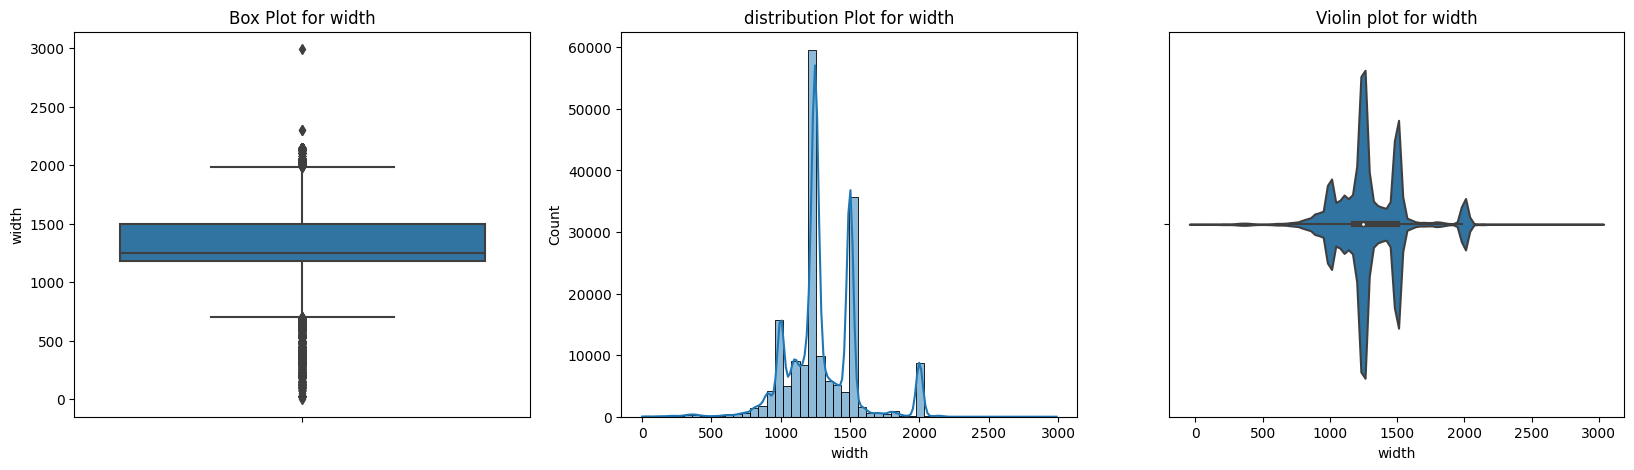

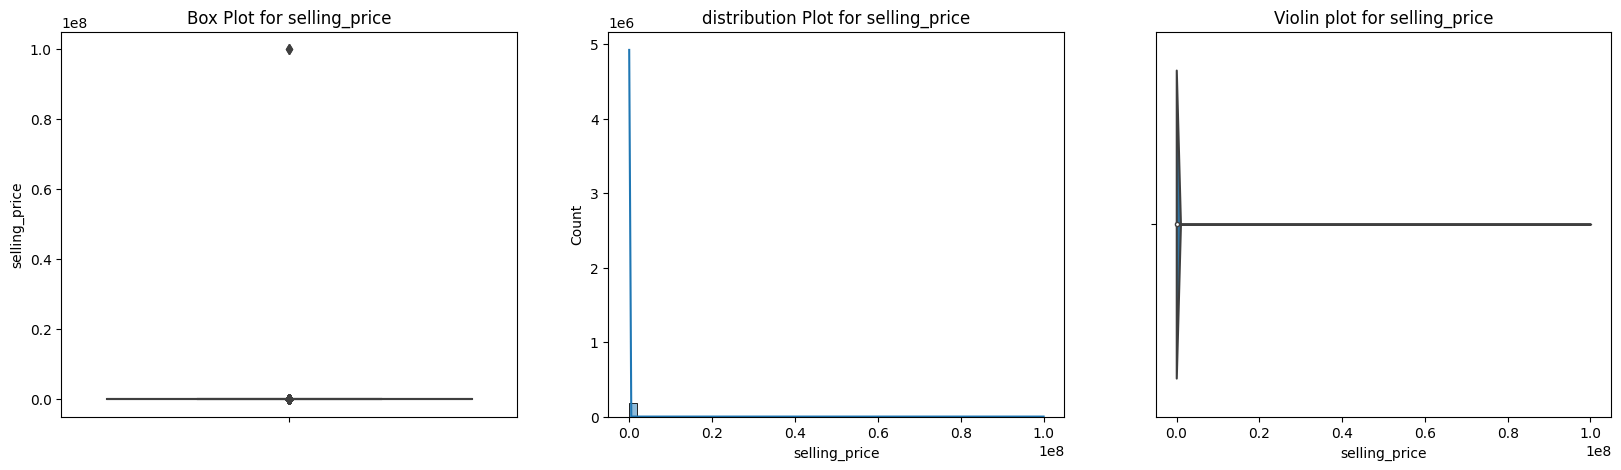

In [27]:
def plot(df,column):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=df,y=column)
  plt.title(f'Box Plot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data=df,x=column,kde=True,bins=50)
  plt.title(f'distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data=df,x=column)
  plt.title(f'Violin plot for {column}')
  plt.show()

for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [28]:
df1=df.copy()
df1['quantity tons']=np.log(df1['quantity tons'])
df1['selling_price']=np.log(df1['selling_price'])
df1['thickness'] = np.log(df1['thickness'])
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,2000.0,640665,2021-03-01,6.357842


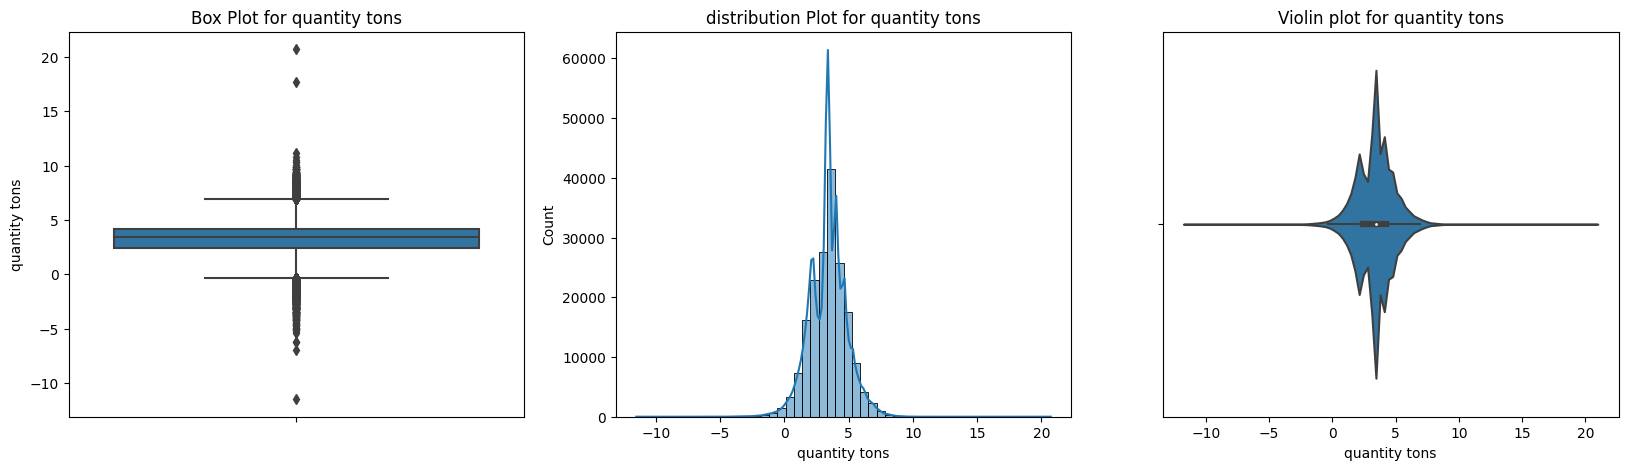

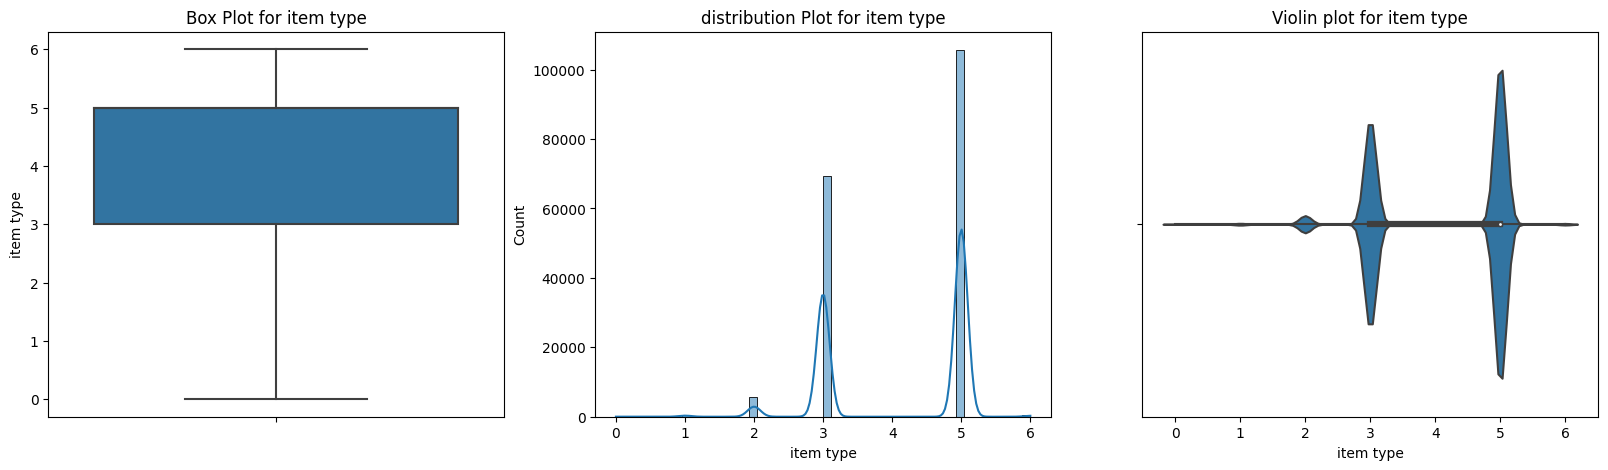

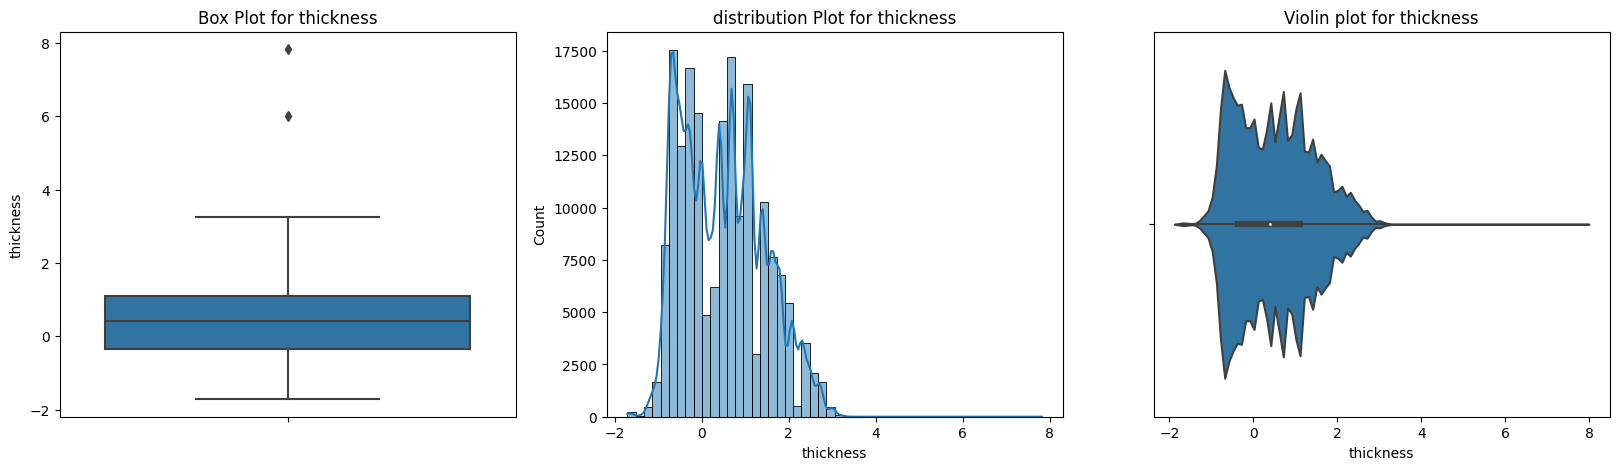

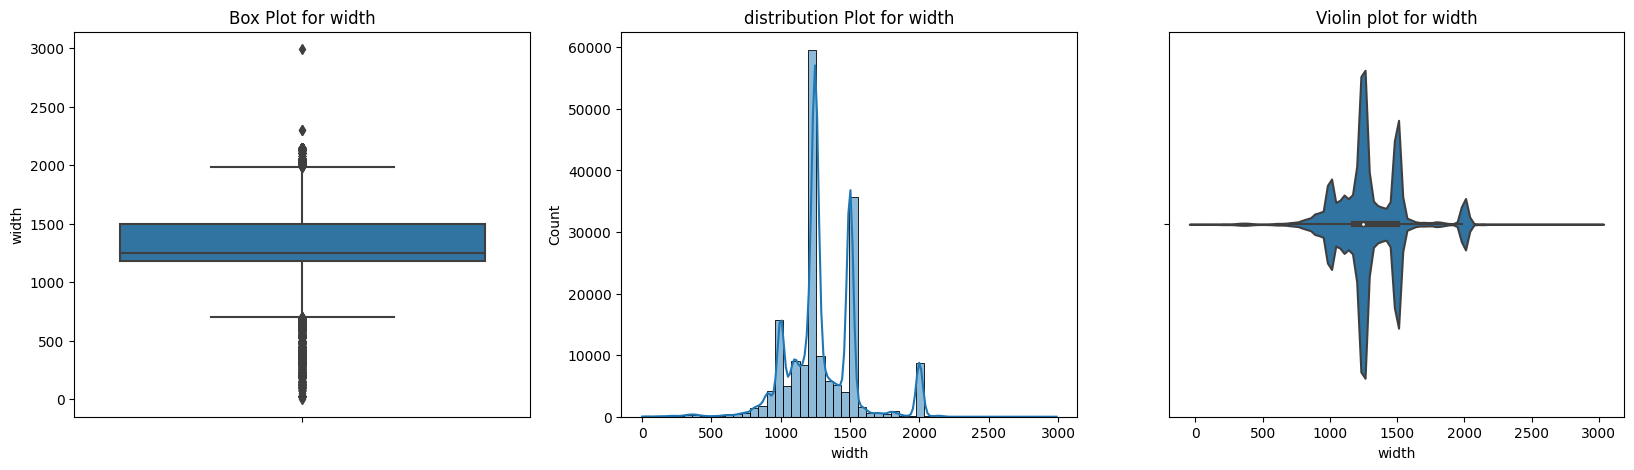

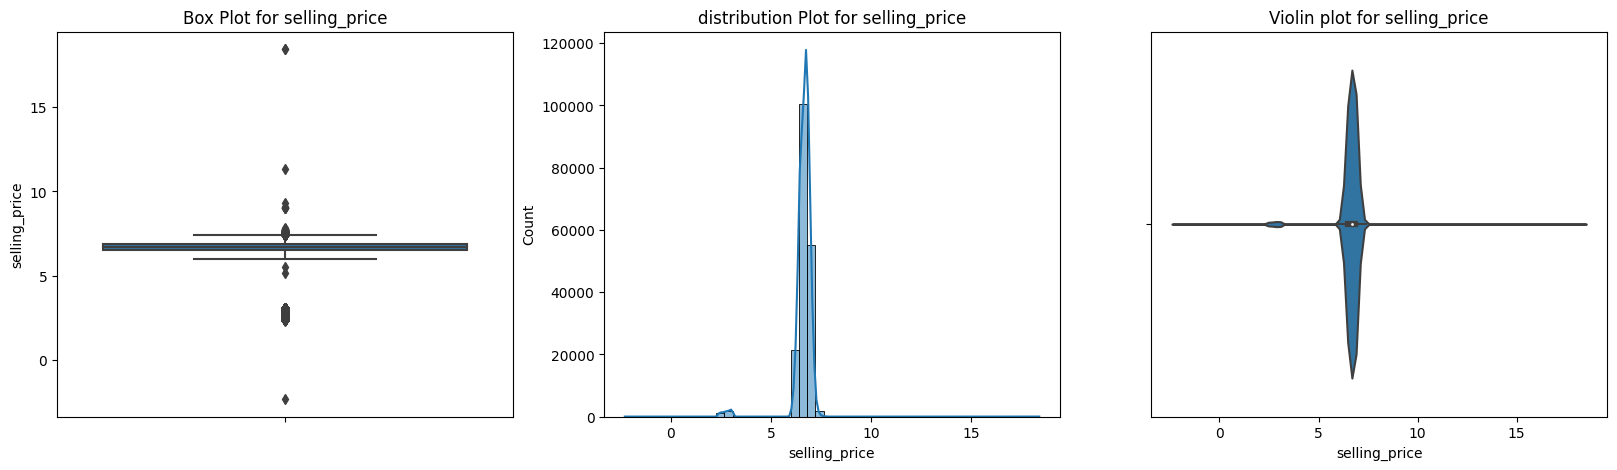

In [30]:
for i in ['quantity tons','item type','thickness','width','selling_price']:
    plot(df1, i)

In [29]:
df2=df1.copy()
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,2000.0,640665,2021-03-01,6.357842


In [31]:
def outlier(df,column):
  iqr=df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold=df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold=df[column].quantile(0.25) - (1.5*iqr)
  df[column] = df[column].clip(lower_threshold, upper_threshold)

In [32]:
outlier(df2, 'quantity tons')
outlier(df2, 'thickness')
outlier(df2, 'selling_price')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,1,5.0,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,1,5.0,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,1,5.0,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,3.413291,30200854.0,25.0,1,5.0,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


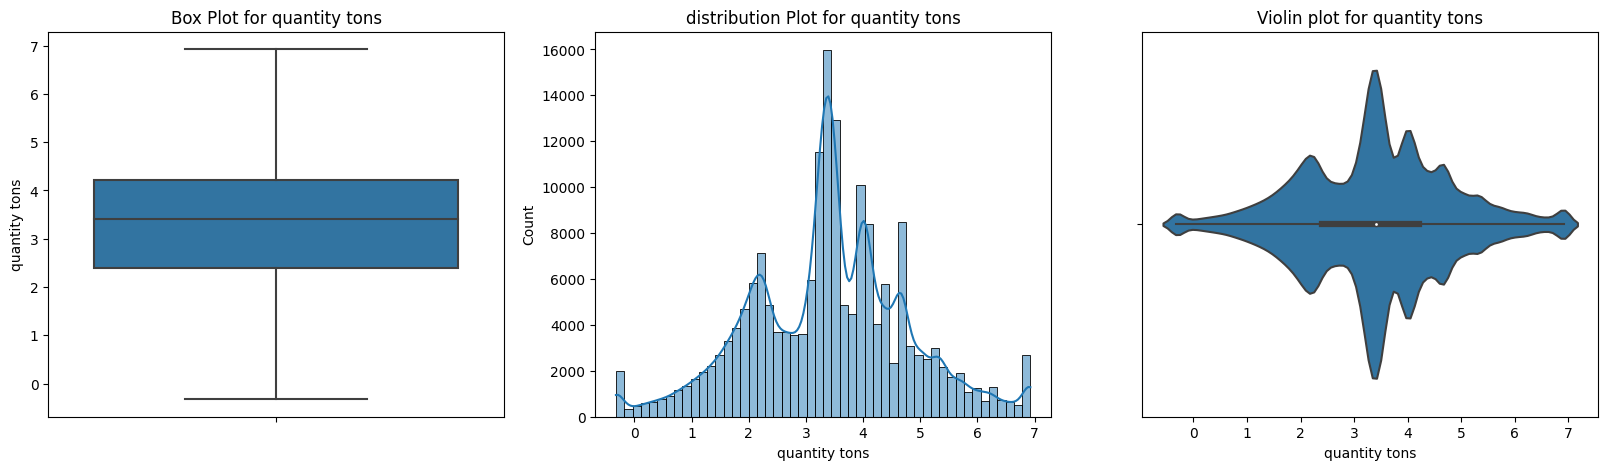

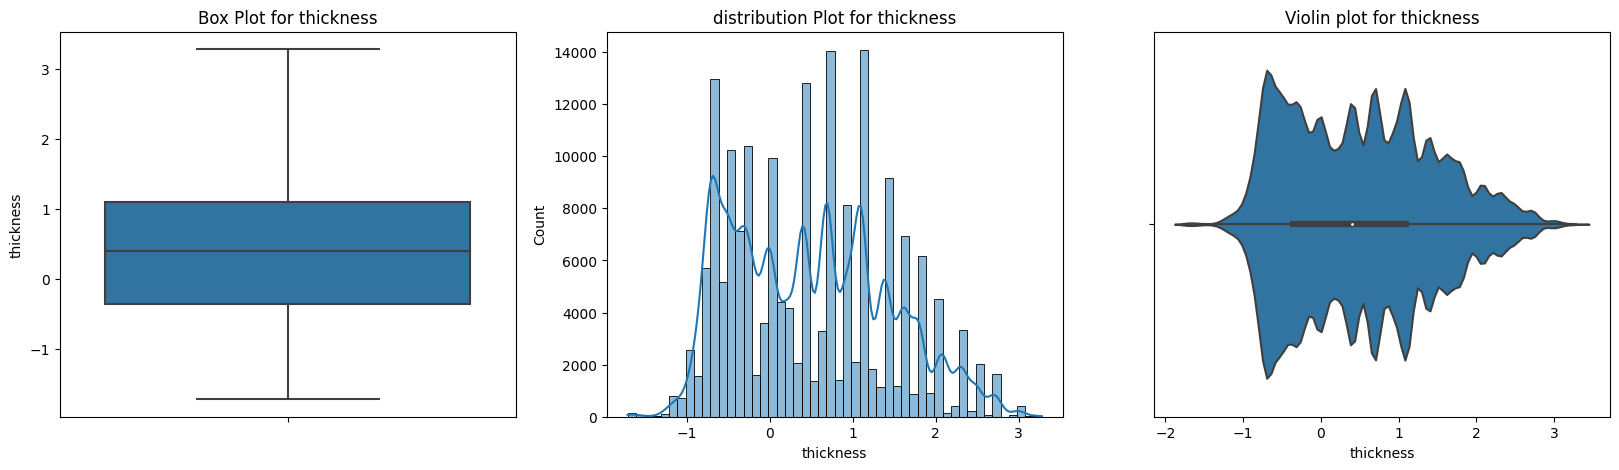

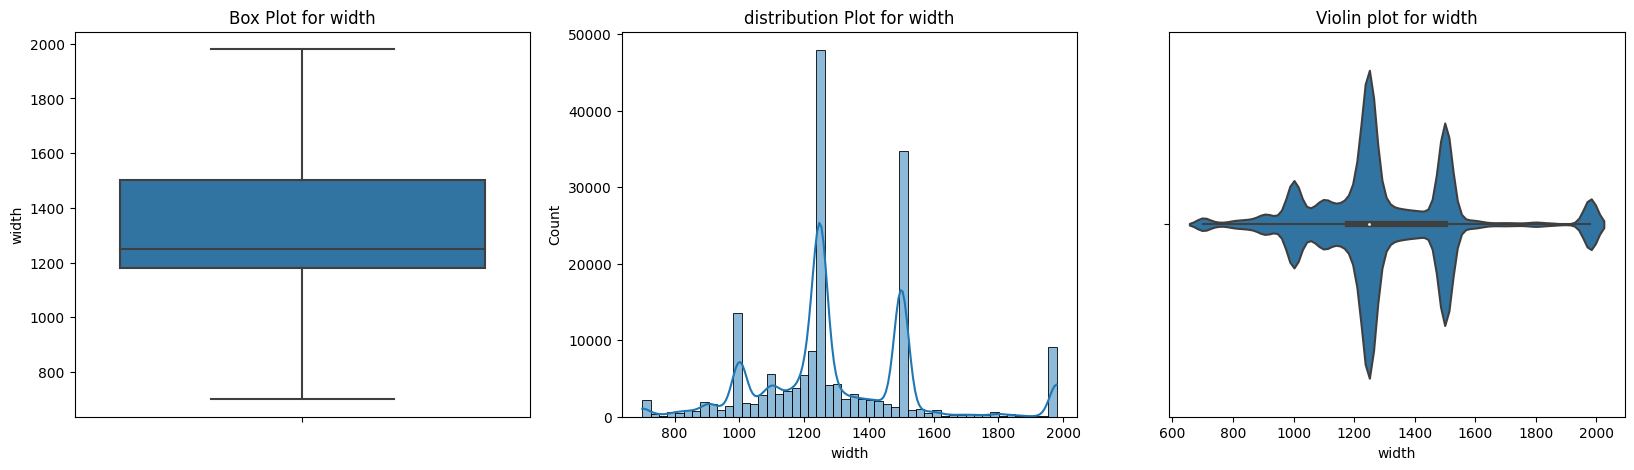

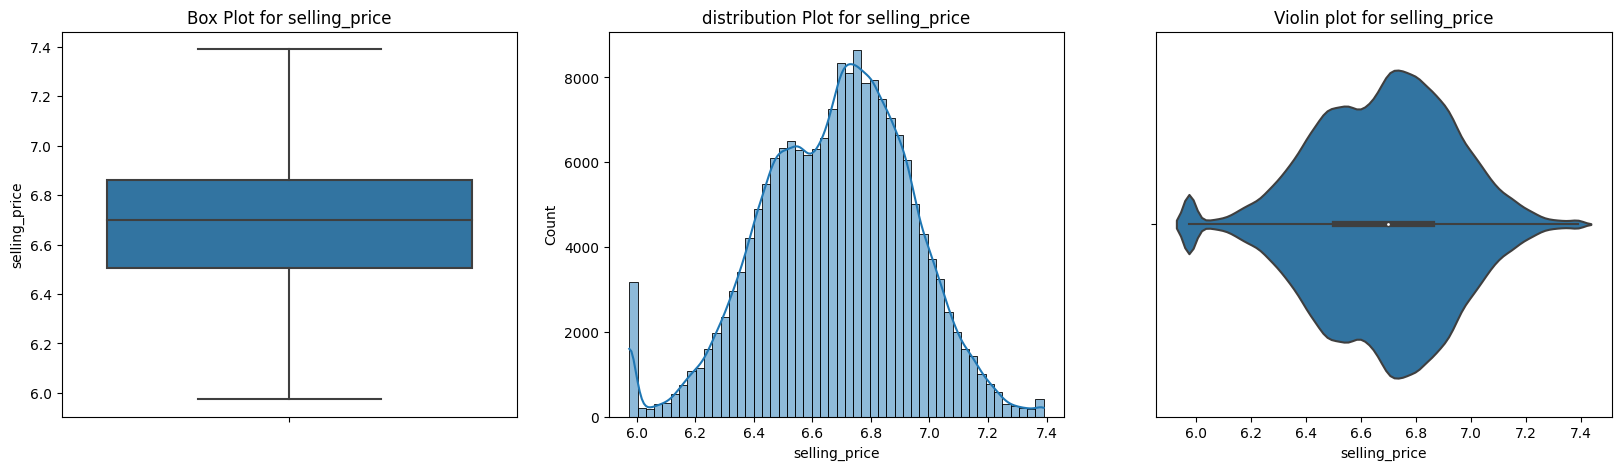

In [33]:
for i in ['quantity tons','thickness','width','selling_price']:
    plot(df2, i)

In [34]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,3.392950e+00,1.394622e+00,-0.322334,2.395316e+00,3.413291e+00,4.207084e+00,6.924734e+00
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,4.803321e-01,9.335680e-01,-1.714798,-3.566749e-01,4.054651e-01,1.098612e+00,3.281543e+00
width,181673.0,1.297046e+03,2.489619e+02,700.000000,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,6.680786e+00,2.553793e-01,5.975038,6.505784e+00,6.699500e+00,6.859615e+00,7.390361e+00


<Axes: >

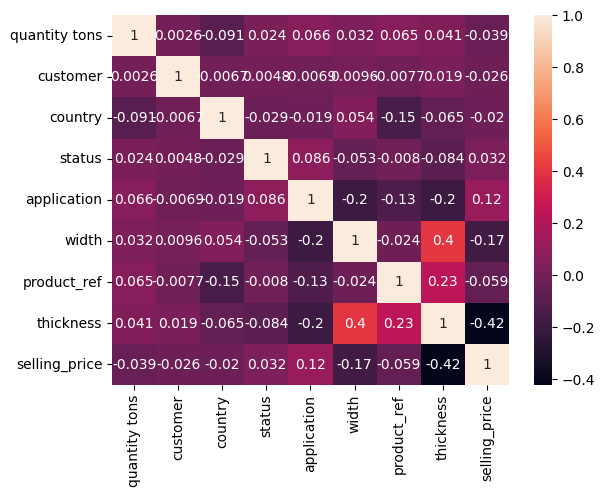

In [35]:
col = ['quantity tons','customer','country','status','application','width','product_ref','thickness','selling_price']
df_heatmap = df2[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [36]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1980.0,640665,2021-03-01,6.357842


**Regression**

In [37]:
df3=df2.copy()

In [38]:
df3.drop(['item_date','delivery date'],axis=1,inplace=True)

In [39]:
df3.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,6.468211
3,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,6.643790
4,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1980.0,640665,6.357842


In [40]:
X=df3.drop('selling_price',axis=1)
y=df3['selling_price']

In [41]:
X.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377
3,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718
4,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1980.0,640665


In [42]:
y.head()

0    6.749931
1    6.953684
2    6.468211
3    6.643790
4    6.357842
Name: selling_price, dtype: float64

**Linear Regression**

In [43]:
linear_model=LinearRegression()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0)
linear_model.fit(X_train,y_train)
pred_lr=linear_model.predict(X_eval)
r2_score_lr=r2_score(y_eval,pred_lr)
print("r2_score:",r2_score_lr)
mse_lr=mean_squared_error(y_eval,pred_lr)
print("Mean_Squared_Error:",mse_lr)
mae_lr=mean_absolute_error(y_eval,pred_lr)
print("Mean_Absolute_Error:",mae_lr)

r2_score: 0.1912573735991433
Mean_Squared_Error: 0.05361629154955396
Mean_Absolute_Error: 0.18396507698665557


In [44]:
print(linear_model.intercept_)
print(X.columns)
print(linear_model.coef_)
print(linear_model.score(X_train, y_train))
print(linear_model.score(X_eval, y_eval))

6.681806675911448
Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref'],
      dtype='object')
[-2.72355024e-03 -1.74733823e-10 -5.27913928e-04 -2.82801315e-04
  1.28287203e-02  5.25506460e-04 -1.16144794e-01  1.53999103e-05
  1.57990923e-11]
0.18481504128728676
0.1912573735991433


**Random Forest Regressor**

In [45]:
rfr=RandomForestRegressor()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0)
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_eval)
r2_score_rfr=r2_score(y_eval,pred_rfr)
print("r2_score:",r2_score_rfr)
mse_rfr=mean_squared_error(y_eval,pred_rfr)
print("Mean_Squared_Error:",mse_rfr)
mae_rfr=mean_absolute_error(y_eval,pred_rfr)
print("Mean_Absolute_Error:",mae_rfr)


r2_score: 0.7092739208331207
Mean_Squared_Error: 0.019273936741828195
Mean_Absolute_Error: 0.10208929980549293


In [46]:
with open("Copper Selling Price Prediction","wb") as f:
  pickle.dump(rfr,f)

**GridSearchCV With Decision Tree Regressor**

In [47]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_eval)
r2_score_dtr=r2_score(y_eval,y_pred)
print("r2_score:",r2_score_dtr)
mse_dtr=mean_squared_error(y_eval,y_pred)
print("Mean_Squared_Error:",mse_dtr)
mae_dtr=mean_absolute_error(y_eval,y_pred)
print("Mean_Absolute_Error:",mae_dtr)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
r2_score: 0.6482931736711588
Mean_Squared_Error: 0.023316708090849205
Mean_Absolute_Error: 0.11129243213478228


**Classification**

In [48]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [49]:
df['status'].value_counts()

1    116012
0     34438
4     19573
6      4276
3      4170
2      3140
7        53
8        10
5         1
Name: status, dtype: int64

In [50]:
df4 = df[df['status'].isin([0,1])]
len(df4)

150450

In [51]:
df4['status'].value_counts()

1    116012
0     34438
Name: status, dtype: int64

In [52]:
X=df4.drop(['item_date','delivery date','status'],axis=1)
y=df4['status']

In [53]:
X.head()

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,5.0,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,5.0,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,6.0,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,3.0,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,5.0,10.0,4.00,2000.0,640665,577.00


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

**Logistic Regression**

In [55]:
lor=LogisticRegression()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
lor.fit(X_train,y_train)
ypred_lor=lor.predict(X_eval)
accuracy_lor=accuracy_score(y_eval,ypred_lor)
print("Accuracy_Score:",accuracy_lor)
confusion_lor=confusion_matrix(y_eval,ypred_lor)
print("Confusion_matrix:")
print(confusion_lor)
precision_lor=precision_score(y_eval,ypred_lor)
print("Precision_Score:",precision_lor)
recall_lor=recall_score(y_eval,ypred_lor)
print("Recall_Score:",recall_lor)


Accuracy_Score: 0.771086739780658
Confusion_matrix:
[[    0  6888]
 [    0 23202]]
Precision_Score: 0.771086739780658
Recall_Score: 1.0


**K Neighbor classifier**

In [56]:
knn=KNeighborsClassifier()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
knn.fit(X_train,y_train)
ypred_knn=knn.predict(X_eval)
accuracy_knn=accuracy_score(y_eval,ypred_knn)
print("Accuracy_Score:",accuracy_knn)
confusion_knn=confusion_matrix(y_eval,ypred_knn)
print("Confusion_matrix:")
print(confusion_knn)
precision_knn=precision_score(y_eval,ypred_knn)
print("Precision_Score:",precision_knn)
recall_knn=recall_score(y_eval,ypred_knn)
print("Recall_Score:",recall_knn)

Accuracy_Score: 0.900033233632436
Confusion_matrix:
[[ 5154  1734]
 [ 1274 21928]]
Precision_Score: 0.9267179443833995
Recall_Score: 0.9450909404361693


**Decision Tree Classifier**

In [57]:
dtc=DecisionTreeClassifier()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
dtc.fit(X_train,y_train)
ypred_dtc=dtc.predict(X_eval)
accuracy_dtc=accuracy_score(y_eval,ypred_dtc)
print("Accuracy_Score:",accuracy_dtc)
confusion_dtc=confusion_matrix(y_eval,ypred_dtc)
print("Confusion_matrix:")
print(confusion_dtc)
precision_dtc=precision_score(y_eval,ypred_dtc)
print("Precision_Score:",precision_dtc)
recall_dtc=recall_score(y_eval,ypred_dtc)
print("Recall_Score:",recall_dtc)

Accuracy_Score: 0.9179793951478896
Confusion_matrix:
[[ 5628  1260]
 [ 1208 21994]]
Precision_Score: 0.9458157736303432
Recall_Score: 0.9479355227997587


**Random Forest Classifier**

In [58]:
rfc=RandomForestClassifier()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
rfc.fit(X_train,y_train)
ypred_rfc=rfc.predict(X_eval)
accuracy_rfc=accuracy_score(y_eval,ypred_rfc)
print("Accuracy_Score:",accuracy_rfc)
confusion_rfc=confusion_matrix(y_eval,ypred_rfc)
print("Confusion_matrix:")
print(confusion_rfc)
precision_rfc=precision_score(y_eval,ypred_rfc)
print("Precision_Score:",precision_rfc)
recall_rfc=recall_score(y_eval,ypred_rfc)
print("Recall_Score:",recall_rfc)


Accuracy_Score: 0.93678963110668
Confusion_matrix:
[[ 5745  1143]
 [  759 22443]]
Precision_Score: 0.9515390485881455
Recall_Score: 0.9672873028187225


In [59]:
with open("Copper Status Prediction","wb") as b:
  pickle.dump(rfc,b)